## Some tests with PNNClassifier here...

In [3]:
import sklearn
import numpy as np
import random
import math

from scipy import integrate
from scipy.stats import norm, uniform

In [4]:
from PNNClassifier import PNNClassifier

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
%%time

df = pd.read_csv("./dataset/synth/train.csv")
xTrain = np.array(df[["xs", "ys"]])
yTrain = np.array(df["yc"])

model = PNNClassifier()
model.fit(xTrain, yTrain)

CPU times: user 52.3 s, sys: 68 ms, total: 52.3 s
Wall time: 52.4 s


In [8]:
%%time

x = np.linspace(-1, 1, num=50, endpoint=True)
y = np.linspace(-0.2, 1, num=50, endpoint=True)
X, Y = np.meshgrid(x, y)
Z = model.predict_proba(np.c_[X.ravel(), Y.ravel()])[:,0]
Z = Z.reshape(X.shape)

CPU times: user 3min 8s, sys: 160 ms, total: 3min 9s
Wall time: 3min 9s


<a list of 6 text.Text objects>

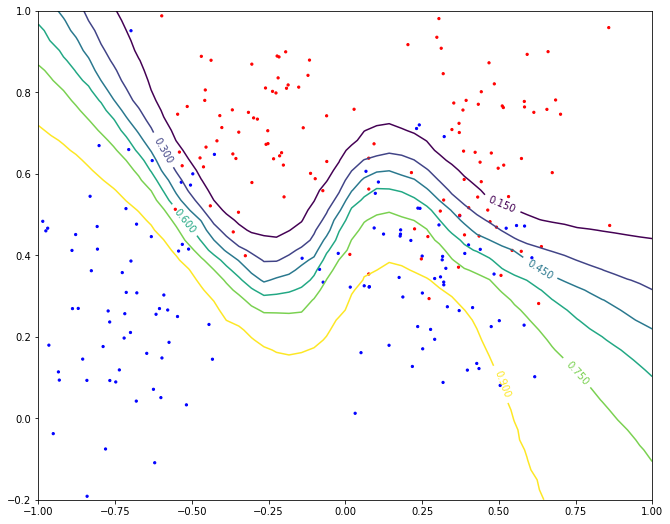

In [9]:
plt.figure(figsize=(11,9))
plt.xlim((-1, 1))
plt.ylim((-0.2, 1))
plt.scatter(xTrain[:,0], xTrain[:,1], c=yTrain, s=5, cmap="bwr")
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)